In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../data/deaths08.csv")
print(dataset.head())
print(dataset["hod"].unique())
dataset = dataset.loc[(dataset["hod"] != 99) & (dataset["hod"] != 0) & (dataset["hod"] != 24)]
print(dataset["hod"].unique())

print(len(dataset))
print(len(dataset.columns))
print(dataset.columns)

dataset = dataset[["yod", "mod", "dod", "hod", "cod"]]
dataset.head()

    yob  mob  dob  sex age_unit  age  nation  marital  stateL  countyL  \
0  1918    0    0    1        A   90       1        2       1        1   
1  1936    0    0    1        A   72       1        2       1        1   
2  1959    0    0    1        A   49       1        5      33        0   
3  1929    0    0    2        A   79       1        5       1        1   
4  1993    0    0    1        A   15       1        1       1        1   

    ...     year_reg  mon_reg  day_reg  weight  year_cert  mon_cert  day_cert  \
0   ...         2008        1        8    8888       2008         1         7   
1   ...         2008        1       14    8888       2008         1        13   
2   ...         2008        1       17    8888       2008         1        12   
3   ...         2008        1       21    8888       2008         1        20   
4   ...         2008        1        2    8888       2008         1         1   

   pregnant  labor_cod  labor_c  
0         8          8        8  


,yod,mod,dod,hod,cod
0,2008,1,7,20,F17
1,2008,1,13,14,I05
2,2008,1,12,20,K65
3,2008,1,20,10,I38
4,2008,1,1,15,N18


In [3]:
diseaseDF = pd.read_csv("../icd-main.csv")
diseaseDF.head()

,code,disease
0,A00,Cholera
1,A01,Typhoid and paratyphoid fevers
2,A02,Other salmonella infections
3,A03,Shigellosis
4,A04,Other bacterial intestinal infections


In [4]:
# ERROR in Hadley's
print(dataset.yod.unique())
dataset = dataset.loc[(dataset["yod"] == 2008) & (dataset["mod"] != 0) & (dataset["dod"] != 0)]
print(dataset.yod.unique())

[2008 2007 2000 2005 2006 2004 1991 1931 1992 2002 1995 1996 1997 2001
 2003 1999 1993 1998 1983 1979 1930 1988 1984 1986 1994 1990 1944 1975
 1985 1982 1980 1941 1953 1961 1968 1977 1934 1973 1989 1972 1970 1978
 1929 1962 1987 1950 1965 1976 1967 1926 1971 1935 1923 1964 1981 1947
 1966 1920 1928 1960 1969]
[2008]


In [5]:
print(dataset["dod"].unique())
print(dataset["mod"].unique())

[ 7 13 12 20  1 11 27  2 16 23 25 26  8  9 19 22 29  6 10 17 15 14 21  3
 24  4 18 28  5 30 31]
[ 1  2  4  3  5  6  7  8  9 10 11 12]


In [6]:
subset = dataset[np.isfinite(dataset['hod'])]

In [7]:
print(len(subset))

502520


(15000, 25048.8)

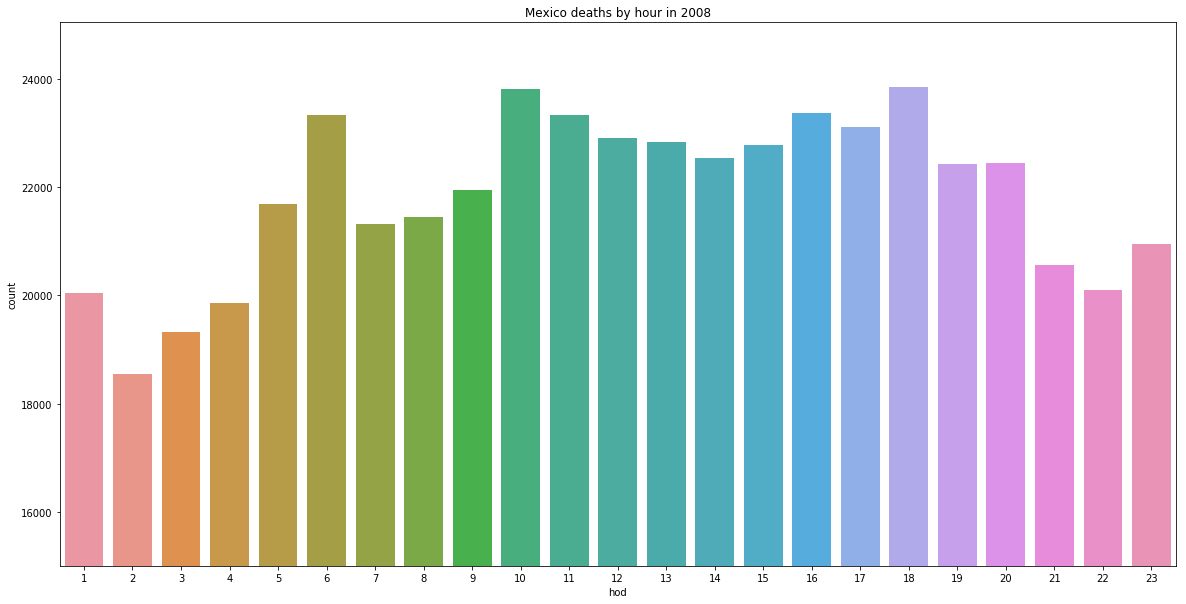

In [8]:
plt.figure(figsize=(20,10))
plt.title("Mexico deaths by hour in 2008")
ax = sns.countplot(x="hod", data=subset)
ax.set_ylim(bottom=15000)

In [71]:
deathDiseaseFreq = subset.groupby(["cod", "hod"]).size()
a = pd.DataFrame({'Code_Hour':deathDiseaseFreq.index, 'Frequency':deathDiseaseFreq.values})
a['code'] = a.apply(lambda x: x.Code_Hour[0], axis=1)
a['hour'] = a.apply(lambda x: x.Code_Hour[1], axis=1)
a = pd.merge(a, diseaseDF, on="code")
a["freq"] = a.apply(lambda x: x.Code_Hour[1], axis=1)
a

,Code_Hour,Frequency,code,hour,disease,freq
0,"(A01, 1)",3,A01,1,Typhoid and paratyphoid fevers,0.000006
1,"(A01, 2)",1,A01,2,Typhoid and paratyphoid fevers,0.000002
2,"(A01, 3)",3,A01,3,Typhoid and paratyphoid fevers,0.000006
3,"(A01, 5)",4,A01,5,Typhoid and paratyphoid fevers,0.000008
4,"(A01, 6)",1,A01,6,Typhoid and paratyphoid fevers,0.000002
5,"(A01, 8)",1,A01,8,Typhoid and paratyphoid fevers,0.000002
6,"(A01, 10)",2,A01,10,Typhoid and paratyphoid fevers,0.000004
7,"(A01, 11)",2,A01,11,Typhoid and paratyphoid fevers,0.000004
8,"(A01, 12)",1,A01,12,Typhoid and paratyphoid fevers,0.000002
9,"(A01, 13)",6,A01,13,Typhoid and paratyphoid fevers,0.000012


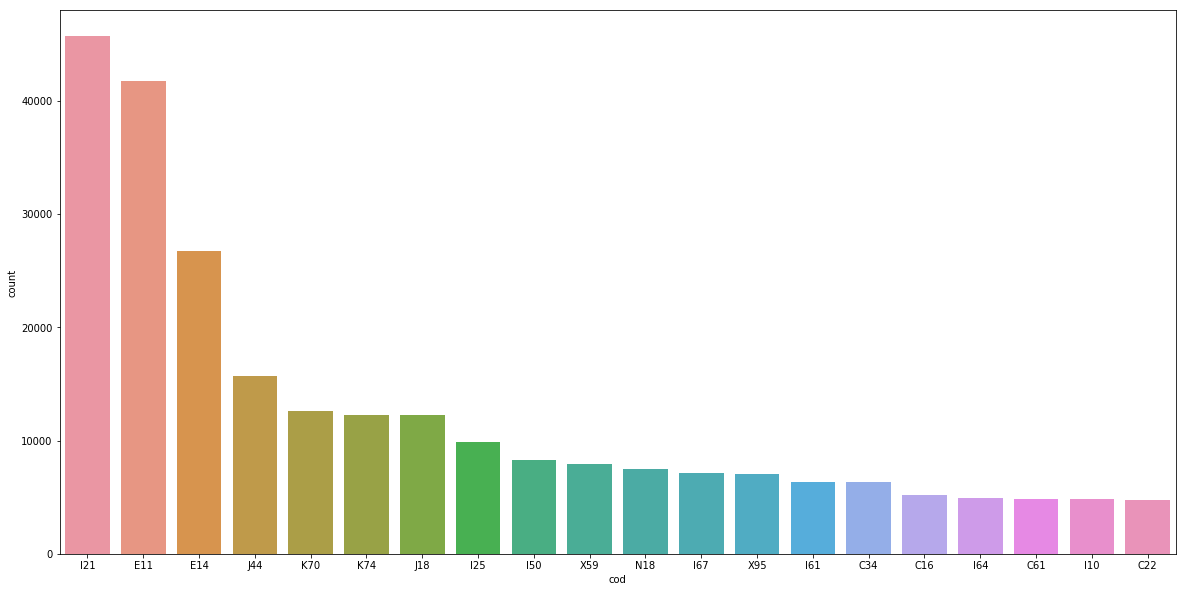

In [10]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="cod", data=subset, order=subset.cod.value_counts().iloc[:20].index)

In [11]:
subsetDeaths = subset[["yod", "mod", "dod", "hod", "cod"]]
subsetDeaths.head()

,yod,mod,dod,hod,cod
0,2008,1,7,20,F17
1,2008,1,13,14,I05
2,2008,1,12,20,K65
3,2008,1,20,10,I38
4,2008,1,1,15,N18


In [12]:
with open('subsetDeaths.tex', 'w') as tf:
    tf.write(subsetDeaths.head().to_latex(index=False))

In [13]:
subsetDeathsDisease = pd.merge(subsetDeaths, diseaseDF, how="left", left_on=['cod'], right_on=['code'])
subsetDeathsDisease.head()

,yod,mod,dod,hod,cod,code,disease
0,2008,1,7,20,F17,F17,Mental and behavioral disorders due to use of ...
1,2008,1,13,14,I05,I05,Rheumatic mitral valve diseases
2,2008,1,12,20,K65,K65,Peritonitis
3,2008,1,20,10,I38,I38,"Endocarditis, valve unspecified"
4,2008,1,1,15,N18,N18,Chronic renal failure


In [14]:
for column in subsetDeathsDisease:
    print(column, subsetDeathsDisease[column].unique())

yod [2008]
mod [ 1  2  4  3  5  6  7  8  9 10 11 12]
dod [ 7 13 12 20  1 11 27  2 16 23 25 26  8  9 19 22 29  6 10 17 15 14 21  3
 24  4 18 28  5 30 31]
hod [20 14 10 15 22  1  4 18 17 21 13  3  6 23  9 16 12 11  7  5  8  2 19]
cod ['F17' 'I05' 'K65' ... 'Q50' 'X27' 'V73']
code ['F17' 'I05' 'K65' ... 'Q50' 'X27' 'V73']
disease ['Mental and behavioral disorders due to use of tobacco  '
 'Rheumatic mitral valve diseases' 'Peritonitis' ...
 'Congenital malformations of ovaries, fallopian tubes, and broad ligaments'
 'Contact with other specified venomous animals'
 'Bus occupant injured in collision with car, pickup truck, or van']


In [15]:
with open('subsetDeathsDisease.tex', 'w') as tf:
    tf.write(subsetDeathsDisease.head().to_latex(index=False))

In [16]:
overall = subsetDeathsDisease["hod"].value_counts().rename_axis('unique_values').reset_index(name='frequency')
overall = overall.sort_values(by=['unique_values'])
overall

,unique_values,frequency
19,1,20244
22,2,18719
21,3,19532
20,4,20079
13,5,21900
3,6,23587
15,7,21569
14,8,21683
12,9,22183
1,10,24069


In [17]:
overall["prop_all"] = overall["frequency"] / overall["frequency"].sum()
overall

,unique_values,frequency,prop_all
19,1,20244,0.039859
22,2,18719,0.036856
21,3,19532,0.038457
20,4,20079,0.039534
13,5,21900,0.043120
3,6,23587,0.046441
15,7,21569,0.042468
14,8,21683,0.042692
12,9,22183,0.043677
1,10,24069,0.047390


In [18]:
with open('overall.tex', 'w') as tf:
    tf.write(overall.head().to_latex(index=False))